In [2]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [3]:
#CSV Reader
df= pd.read_csv("Resources/EPA_SmartLocationDatabase_V3_Jan_2021_Final (3).csv")
df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,6.876848e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220735,220736,7.803100e+11,7.803100e+11,78,30,961000,2,NaN,NaN,NaN,...,-99999.000000,-99999.000000,-99999.000000,1,1,20,1,7.333333,3414.446949,3.355857e+05
220736,220737,7.803100e+11,7.803100e+11,78,30,961000,3,NaN,NaN,NaN,...,-99999.000000,-99999.000000,-99999.000000,1,1,20,1,7.333333,2421.025608,2.924305e+05
220737,220738,7.803100e+11,7.803100e+11,78,30,961000,5,NaN,NaN,NaN,...,-99999.000000,-99999.000000,-99999.000000,1,1,20,1,7.333333,1955.909418,1.619395e+05
220738,220739,7.803100e+11,7.803100e+11,78,30,960700,3,NaN,NaN,NaN,...,-99999.000000,-99999.000000,-99999.000000,1,1,10,1,4.000000,16896.768870,1.038966e+07


In [4]:
#number of rows and columns
df.shape

(220740, 117)

### Data Clean Up

In [5]:
#finding all null values
nan_df= df[df.isna().any(axis=1)]
nan_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
78,79,4.842200e+11,4.842200e+11,48,421,950200,2,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,19,18,17,1,12.166667,8560.072731,2.772020e+06
301,302,4.833200e+11,4.833200e+11,48,331,950700,3,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,17,6,7,1,6.500000,8533.704584,4.457269e+06
302,303,4.833200e+11,4.833200e+11,48,331,950700,4,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,15,13,15,1,10.000000,8146.389254,2.489905e+06
303,304,4.833200e+11,4.833200e+11,48,331,950700,5,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,5,13,8,1,6.000000,9642.922576,4.165242e+06
307,308,4.820800e+11,4.820800e+11,48,207,950300,3,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,10,10,12,1,7.666667,8441.113367,3.018433e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220735,220736,7.803100e+11,7.803100e+11,78,30,961000,2,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,20,1,7.333333,3414.446949,3.355857e+05
220736,220737,7.803100e+11,7.803100e+11,78,30,961000,3,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,20,1,7.333333,2421.025608,2.924305e+05
220737,220738,7.803100e+11,7.803100e+11,78,30,961000,5,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,20,1,7.333333,1955.909418,1.619395e+05
220738,220739,7.803100e+11,7.803100e+11,78,30,960700,3,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,10,1,4.000000,16896.768870,1.038966e+07


In [6]:
#Drop NA rows
clean_df=df.dropna()
clean_df

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220646,220647,7.202100e+11,7.202100e+11,72,21,30200,2,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,18,1,6.666667,1632.404551,139386.4852
220647,220648,7.202100e+11,7.202100e+11,72,21,31401,2,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,17,1,6.333333,1474.513645,109441.0787
220648,220649,7.202100e+11,7.202100e+11,72,21,31202,1,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,16,1,6.000000,2112.392508,199405.4456
220649,220650,7.205320e+11,7.205320e+11,72,53,150400,3,490.0,"San Juan-Bayamón, PR",41980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,14,1,5.333333,4448.103039,498971.9856


In [7]:
#Drop census block group in all Puerto Rico areas as most data fields are empty 
clean_df2=clean_df.apply(lambda row: row[df['CSA_Name'].isin(['San Juan-Bayamón, PR','Ponce-Yauco-Coamo, PR', 'Mayagüez-San Germán, PR'])==False])
clean_df2

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,6.876848e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217324,217325,5.505900e+11,5.505900e+11,55,59,800,3,176.0,"Chicago-Naperville, IL-IN-WI",16980.0,...,-99999.000000,-99999.000000,-99999.000000,5,9,17,1,8.333333,3098.156066,3.834702e+05
217325,217326,5.505900e+11,5.505900e+11,55,59,2700,1,176.0,"Chicago-Naperville, IL-IN-WI",16980.0,...,-99999.000000,-99999.000000,-99999.000000,20,13,4,1,7.166667,36392.505620,5.641533e+07
217326,217327,5.505900e+11,5.505900e+11,55,59,2100,2,176.0,"Chicago-Naperville, IL-IN-WI",16980.0,...,-99999.000000,-99999.000000,-99999.000000,1,1,8,1,3.333333,2229.943841,2.786423e+05
217327,217328,5.513320e+11,5.513320e+11,55,133,203804,3,376.0,"Milwaukee-Racine-Waukesha, WI",33340.0,...,-99999.000000,-99999.000000,-99999.000000,10,9,5,1,5.166667,12519.346340,9.448981e+06


In [8]:
# #Pull Columns Needed for Data Analysis
Data_set= clean_df2[['CBSA_Name', 'NatWalkInd', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk','AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1','AutoOwn2p', 'Pct_AO2p', 'D3A', 'D3AAO', 'D3APO', 'D4A','D4B025', 'D5BE', 'D5BR']]
Data_set

,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,D3A,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR
0,"Dallas-Fort Worth-Arlington, TX",14.000000,412,99,122,191,69,0.163121,39,0.092199,315,0.744681,23.534900,0.000000,12.879623,362.10,0.0,53504,135362
1,"Dallas-Fort Worth-Arlington, TX",10.833333,395,76,107,212,0,0.000000,168,0.410758,241,0.589242,22.893366,0.755137,19.278747,718.84,0.0,90089,236885
2,"Dallas-Fort Worth-Arlington, TX",8.333333,463,136,189,138,19,0.057751,143,0.434650,167,0.507599,14.210509,6.128365,5.470714,398.31,0.0,82815,230587
3,"Dallas-Fort Worth-Arlington, TX",15.666667,431,60,69,302,0,0.000000,43,0.111979,341,0.888021,32.178373,2.208594,20.646233,386.24,0.0,79657,168433
4,"Dallas-Fort Worth-Arlington, TX",10.166667,579,91,84,404,5,0.014577,67,0.195335,271,0.790087,22.058651,2.289659,16.592921,638.37,0.0,48682,120826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217324,"Chicago-Naperville-Elgin, IL-IN-WI",8.333333,599,215,209,175,92,0.190083,102,0.210744,290,0.599174,25.474143,0.000000,25.474143,-99999.00,0.0,-99999,-99999
217325,"Chicago-Naperville-Elgin, IL-IN-WI",7.166667,1225,285,330,610,17,0.018066,146,0.155154,778,0.826780,3.674312,1.254054,1.454357,-99999.00,0.0,-99999,-99999
217326,"Chicago-Naperville-Elgin, IL-IN-WI",3.333333,422,112,151,159,0,0.000000,139,0.511029,133,0.488971,19.091198,0.000000,19.091198,-99999.00,0.0,-99999,-99999
217327,"Milwaukee-Waukesha, WI",5.166667,780,180,179,421,19,0.040084,53,0.111814,402,0.848101,4.547485,0.047291,2.909380,-99999.00,0.0,-99999,-99999


In [9]:
#Drop rows with -99999 value as this indicates missing values 
Data_set= Data_set.loc[Data_set['D4A'] != -99999.00]
Data_set

,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,D3A,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR
0,"Dallas-Fort Worth-Arlington, TX",14.000000,412,99,122,191,69,0.163121,39,0.092199,315,0.744681,23.534900,0.000000,12.879623,362.10,0.0,53504,135362
1,"Dallas-Fort Worth-Arlington, TX",10.833333,395,76,107,212,0,0.000000,168,0.410758,241,0.589242,22.893366,0.755137,19.278747,718.84,0.0,90089,236885
2,"Dallas-Fort Worth-Arlington, TX",8.333333,463,136,189,138,19,0.057751,143,0.434650,167,0.507599,14.210509,6.128365,5.470714,398.31,0.0,82815,230587
3,"Dallas-Fort Worth-Arlington, TX",15.666667,431,60,69,302,0,0.000000,43,0.111979,341,0.888021,32.178373,2.208594,20.646233,386.24,0.0,79657,168433
4,"Dallas-Fort Worth-Arlington, TX",10.166667,579,91,84,404,5,0.014577,67,0.195335,271,0.790087,22.058651,2.289659,16.592921,638.37,0.0,48682,120826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217239,"Oshkosh-Neenah, WI",11.000000,385,116,147,122,28,0.101083,90,0.324910,159,0.574007,23.955164,0.000000,20.046790,480.12,0.0,15240,20526
217240,"Oshkosh-Neenah, WI",9.833333,505,119,206,180,0,0.000000,84,0.177966,388,0.822034,18.732343,0.000000,18.732343,595.46,0.0,15311,25141
217241,"Oshkosh-Neenah, WI",15.166667,608,160,237,211,11,0.022680,106,0.218557,368,0.758763,22.289758,0.000000,18.908655,134.11,0.0,14483,15348
217245,"Milwaukee-Waukesha, WI",8.000000,437,108,105,224,9,0.022333,171,0.424318,223,0.553350,19.280133,5.324622,13.398303,418.43,0.0,6534,9488


In [10]:
#Sort by National Walk Index
Data_set1= Data_set.sort_values("NatWalkInd", ascending=False).reset_index()
Data_set1

,index,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,D3A,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR
0,39730,"Los Angeles-Long Beach-Anaheim, CA",20.000000,535,99,153,283,184,0.393162,147,0.314103,137,0.292735,27.188103,0.0,22.690802,126.07,0.000000,184345,281212
1,34840,"San Francisco-Oakland-Berkeley, CA",20.000000,456,38,48,370,117,0.208929,327,0.583929,116,0.207143,32.894599,0.0,23.708112,144.84,0.856784,220015,519108
2,160923,"New York-Newark-Jersey City, NY-NJ-PA",20.000000,501,101,112,288,77,0.141026,382,0.699634,87,0.159341,33.901783,0.0,21.326475,151.55,0.992191,345206,512184
3,54882,"Glenwood Springs, CO",20.000000,700,201,233,266,0,0.000000,125,0.282167,318,0.717833,31.505238,0.0,30.713517,126.07,0.000000,4761,5742
4,113801,"Boston-Cambridge-Newton, MA-NH",20.000000,415,85,148,182,155,0.536332,82,0.283737,52,0.179931,26.842218,0.0,23.205366,158.25,0.000000,61697,91869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84904,162021,"New York-Newark-Jersey City, NY-NJ-PA",5.666667,25,9,6,10,0,0.000000,0,0.000000,0,0.000000,0.767410,0.0,0.767410,603.50,0.000000,791795,1605396
84905,160870,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,0.000000,0,0.000000,2.313139,0.0,2.313139,654.47,0.151904,430014,831152
84906,163147,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,0.000000,0,0.000000,2.909241,0.0,2.909241,747.00,0.000000,684827,1441344
84907,149641,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,0.000000,0,0.000000,0.000000,0.0,0.000000,655.81,0.000000,366455,1582123


In [11]:
#Create 3 new columns calculating, % of workers with high, medium, low incomes per Census Block Group
Data_set1["% of Workers with High income per CBG"]= (Data_set1["R_HiWageWk"]/Data_set1["Workers"])
Data_set1["% of Workers with Medium income per CBG"]= (Data_set1["R_MedWageWk"]/Data_set1["Workers"])
Data_set1["% of Workers with Low income per CBG"]= (Data_set1["R_LowWageWk"]/Data_set1["Workers"])
Data_set1

,index,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,...,D3A,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR,% of Workers with High income per CBG,% of Workers with Medium income per CBG,% of Workers with Low income per CBG
0,39730,"Los Angeles-Long Beach-Anaheim, CA",20.000000,535,99,153,283,184,0.393162,147,...,27.188103,0.0,22.690802,126.07,0.000000,184345,281212,0.528972,0.285981,0.185047
1,34840,"San Francisco-Oakland-Berkeley, CA",20.000000,456,38,48,370,117,0.208929,327,...,32.894599,0.0,23.708112,144.84,0.856784,220015,519108,0.811404,0.105263,0.083333
2,160923,"New York-Newark-Jersey City, NY-NJ-PA",20.000000,501,101,112,288,77,0.141026,382,...,33.901783,0.0,21.326475,151.55,0.992191,345206,512184,0.574850,0.223553,0.201597
3,54882,"Glenwood Springs, CO",20.000000,700,201,233,266,0,0.000000,125,...,31.505238,0.0,30.713517,126.07,0.000000,4761,5742,0.380000,0.332857,0.287143
4,113801,"Boston-Cambridge-Newton, MA-NH",20.000000,415,85,148,182,155,0.536332,82,...,26.842218,0.0,23.205366,158.25,0.000000,61697,91869,0.438554,0.356627,0.204819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84904,162021,"New York-Newark-Jersey City, NY-NJ-PA",5.666667,25,9,6,10,0,0.000000,0,...,0.767410,0.0,0.767410,603.50,0.000000,791795,1605396,0.400000,0.240000,0.360000
84905,160870,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,...,2.313139,0.0,2.313139,654.47,0.151904,430014,831152,NaN,NaN,NaN
84906,163147,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,...,2.909241,0.0,2.909241,747.00,0.000000,684827,1441344,NaN,NaN,NaN
84907,149641,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,...,0.000000,0.0,0.000000,655.81,0.000000,366455,1582123,NaN,NaN,NaN


### High-Income Analysis

In [12]:
#Locate most walkable groups based on National Walk index
Data_set2=Data_set1.loc[Data_set1["NatWalkInd"]>= 15.26,:]
#Data_set2

In [13]:
#Locate CBG groups where percent of workers income is greater than 75
HighData_set2= Data_set2.loc[Data_set2["% of Workers with High income per CBG"] >= .75,:]
HighData_set2.sort_values("NatWalkInd", ascending=False)

,index,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,...,D3A,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR,% of Workers with High income per CBG,% of Workers with Medium income per CBG,% of Workers with Low income per CBG
1,34840,"San Francisco-Oakland-Berkeley, CA",20.000000,456,38,48,370,117,0.208929,327,...,32.894599,0.000000,23.708112,144.84,0.856784,220015,519108,0.811404,0.105263,0.083333
21,41970,"San Francisco-Oakland-Berkeley, CA",20.000000,754,61,72,621,42,0.069884,365,...,30.032832,4.114970,25.064101,155.57,0.000000,227295,449302,0.823607,0.095491,0.080902
15,206574,"Seattle-Tacoma-Bellevue, WA",20.000000,1875,162,210,1503,627,0.245305,1486,...,30.031724,0.493081,26.679491,104.61,0.000000,175547,431359,0.801600,0.112000,0.086400
29,163846,"New York-Newark-Jersey City, NY-NJ-PA",19.833333,1032,132,108,792,279,0.399142,379,...,64.184875,21.965485,22.775483,130.09,0.457266,1270335,2412041,0.767442,0.104651,0.127907
61,206878,"Seattle-Tacoma-Bellevue, WA",19.833333,788,72,112,604,356,0.354229,487,...,47.983754,0.000000,46.449059,159.59,0.419505,215676,461866,0.766497,0.142132,0.091371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22178,155724,"New York-Newark-Jersey City, NY-NJ-PA",15.333333,514,62,65,387,263,0.695767,93,...,35.695281,0.000000,24.577357,0.00,0.000000,1767384,5107267,0.752918,0.126459,0.120623
22050,151199,"New York-Newark-Jersey City, NY-NJ-PA",15.333333,599,65,65,469,571,0.844675,85,...,43.362778,0.000000,0.000000,309.80,0.950392,1601410,3600634,0.782972,0.108514,0.108514
21783,33317,"San Francisco-Oakland-Berkeley, CA",15.333333,839,63,90,686,97,0.119753,524,...,26.939522,0.000000,26.939522,293.71,0.000000,263119,479360,0.817640,0.107271,0.075089
21758,150337,"New York-Newark-Jersey City, NY-NJ-PA",15.333333,492,49,55,388,582,0.748072,165,...,46.132197,0.000000,0.000000,261.52,1.000000,1597584,3598354,0.788618,0.111789,0.099593


The correlation between walkabilty score and percent of Zero-Car Households in CBG is -0.06.


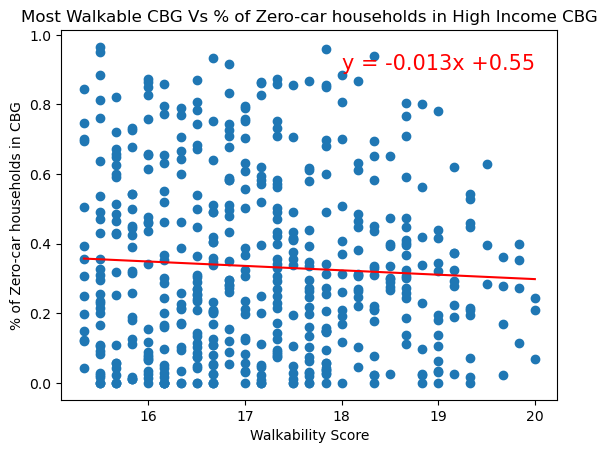

In [14]:
#label x and y axis and title scatter plot
plt.scatter(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO0"])
plt.title("Most Walkable CBG Vs % of Zero-car households in High Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of Zero-car households in CBG")


#Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO0"])
regress_values = HighData_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(HighData_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO0"])

#Printing line regression equation on graph
plt.annotate(line_eq,(18,.9),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of Zero-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/HighIncomeZerocar.png")

The correlation between walkabilty score and percent of One-Car Households in CBG is 0.16.


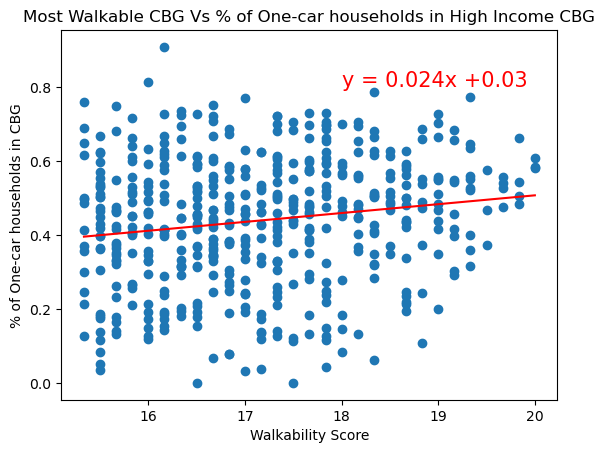

In [15]:
# #label x and y axis and title scatter plot
plt.scatter(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO1"])
plt.title("Most Walkable CBG Vs % of One-car households in High Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of One-car households in CBG")


# #Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO1"])
regress_values = HighData_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(HighData_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO1"])

# #Printing line regression equation on graph
plt.annotate(line_eq,(18,.8),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of One-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/HighIncomeOnecar")

The correlation between walkabilty score and percent of Two-Plus-Car Households in CBG is -0.06.


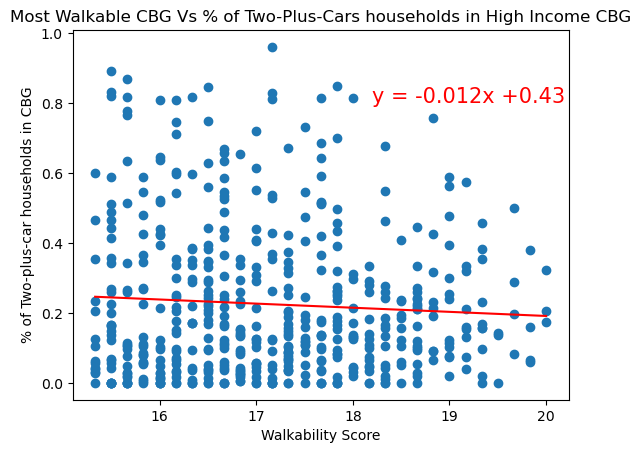

In [16]:
# #label x and y axis and title scatter plot
plt.scatter(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO2p"])
plt.title("Most Walkable CBG Vs % of Two-Plus-Cars households in High Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of Two-plus-car households in CBG")


# #Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO2p"])
regress_values = HighData_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(HighData_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(HighData_set2["NatWalkInd"], HighData_set2["Pct_AO2p"])

# #Printing line regression equation on graph
plt.annotate(line_eq,(18.2,.8),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of Two-Plus-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/HighIncomeTwocar.png")

In [17]:
#Group specific CBG data by Core-Based Statistical Area, and calculate averages for 0, 1, 2+ car owner households, High income per area, Walk score 
Summary_stats_df = HighData_set2.groupby("CBSA_Name")
Average_0car=Summary_stats_df["Pct_AO0"].mean()*100
Average_1car=Summary_stats_df["Pct_AO1"].mean()*100
Average_2car=Summary_stats_df["Pct_AO2p"].mean()*100
Average_high_income_worker=Summary_stats_df["% of Workers with High income per CBG"].mean()*100
Average_Walk_score=Summary_stats_df["NatWalkInd"].mean()

In [18]:
#Place averages in summary table
Summary_table=pd.DataFrame({"Average Number of households with 0 Cars": Average_0car,"Average Number of households with 1 Cars": Average_1car, "Average Number of households with 2 Cars": Average_2car,"Average Workers with High income per CBG":Average_high_income_worker, "Average Walkability Score":Average_Walk_score })
Summary_table.sort_values("Average Walkability Score", ascending=False)

,Average Number of households with 0 Cars,Average Number of households with 1 Cars,Average Number of households with 2 Cars,Average Workers with High income per CBG,Average Walkability Score
CBSA_Name,,,,,
"Minneapolis-St. Paul-Bloomington, MN-WI",19.350527,63.808266,16.841206,76.224411,18.277778
"Seattle-Tacoma-Bellevue, WA",20.074480,54.374849,25.550672,78.399360,17.948718
"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",34.152220,47.299147,18.548633,75.837837,17.863636
"Dallas-Fort Worth-Arlington, TX",2.484331,55.388508,42.127161,77.538493,17.629630
"Chicago-Naperville-Elgin, IL-IN-WI",33.536135,52.091964,14.371901,78.394798,17.455399
"Atlanta-Sandy Springs-Alpharetta, GA",5.404682,53.448580,41.146738,79.550963,17.229167
"San Francisco-Oakland-Berkeley, CA",24.564486,49.889076,25.546438,78.193733,17.159794
"Houston-The Woodlands-Sugar Land, TX",2.495730,43.216155,54.288115,77.397298,17.106061
"Charlotte-Concord-Gastonia, NC-SC",14.230313,59.323519,26.446168,77.386405,17.066667


In [19]:
#Reduce Summary Table
Sum_table=Summary_table[["Average Number of households with 0 Cars", "Average Number of households with 1 Cars", "Average Number of households with 2 Cars"]]
Sum_table

,Average Number of households with 0 Cars,Average Number of households with 1 Cars,Average Number of households with 2 Cars
CBSA_Name,,,
"Atlanta-Sandy Springs-Alpharetta, GA",5.404682,53.448580,41.146738
"Baltimore-Columbia-Towson, MD",7.364341,36.627907,56.007752
"Boston-Cambridge-Newton, MA-NH",32.661176,48.531218,18.807606
"Charlotte-Concord-Gastonia, NC-SC",14.230313,59.323519,26.446168
"Chicago-Naperville-Elgin, IL-IN-WI",33.536135,52.091964,14.371901
"Dallas-Fort Worth-Arlington, TX",2.484331,55.388508,42.127161
"Houston-The Woodlands-Sugar Land, TX",2.495730,43.216155,54.288115
"Minneapolis-St. Paul-Bloomington, MN-WI",19.350527,63.808266,16.841206
"New York-Newark-Jersey City, NY-NJ-PA",63.947678,30.060446,5.234299


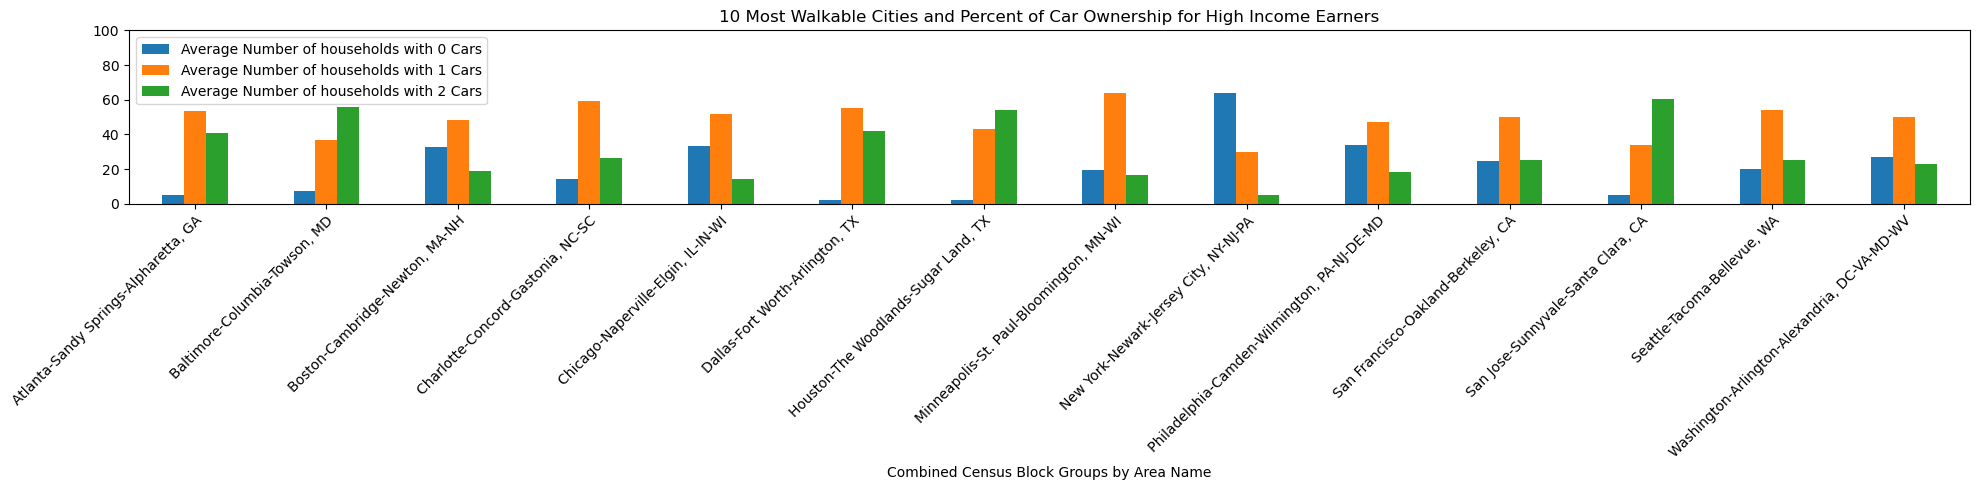

In [63]:
#Bar plot multiple columns
multi_plot = Sum_table.plot(kind="bar", figsize=(20,5), title="10 Most Walkable Cities and Percent of Car Ownership for High Income Earners")

plt.xticks(rotation=45,rotation_mode="anchor", ha="right", wrap=True)
plt.xlabel("Combined Census Block Groups by Area Name")

plt.ylim(0,100)
plt.tight_layout()
plt.savefig("Output_data/HighIncomeBarChart.png")
plt.show()


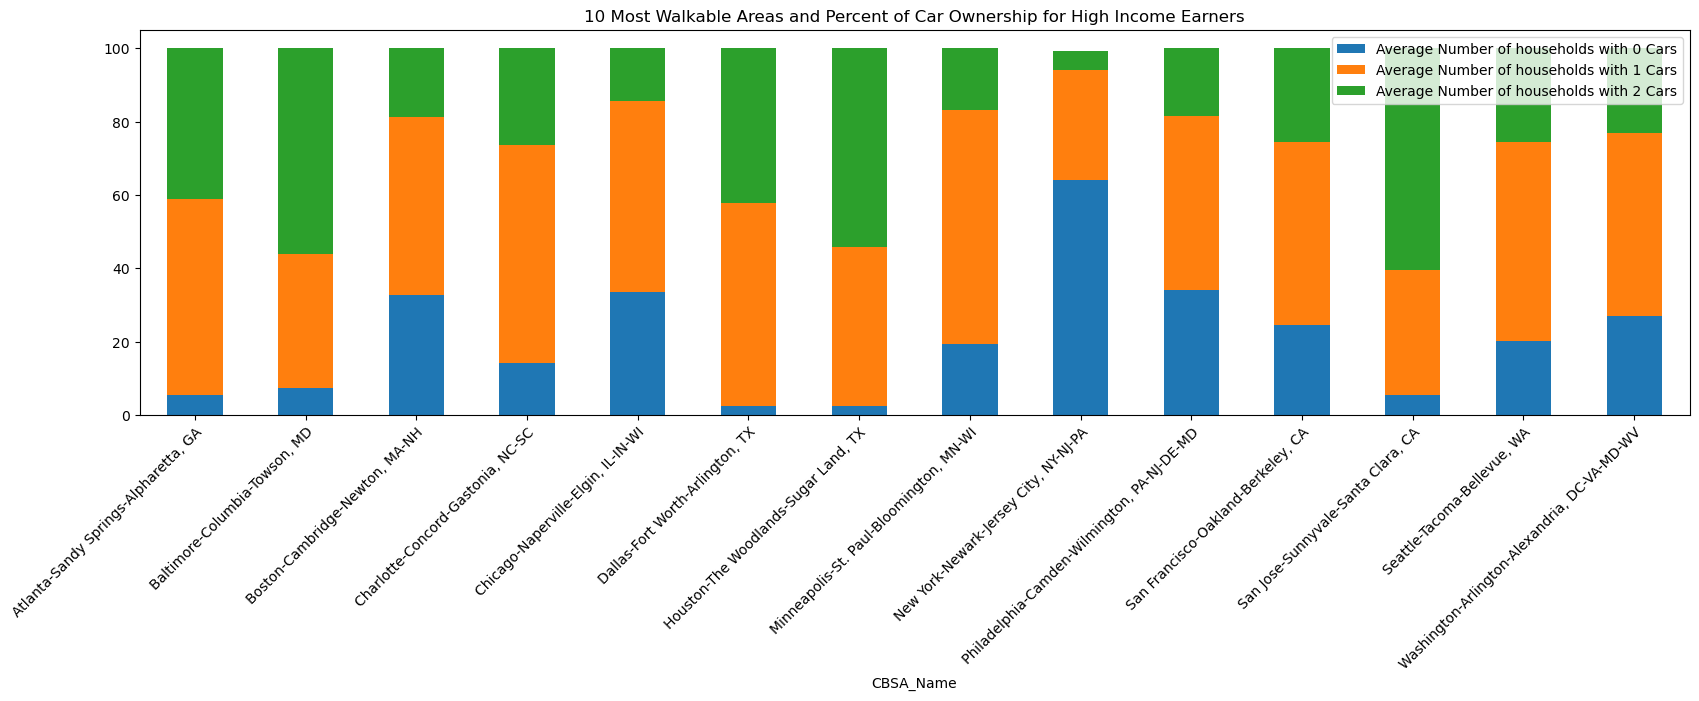

<Figure size 640x480 with 0 Axes>

In [21]:
#Stack Bar plot multiple columns to compare visual with above bar graph
multi_plot2 = Sum_table.plot(kind="bar", figsize=(20,5), stacked=True,title="10 Most Walkable Areas and Percent of Car Ownership for High Income Earners")
plt.xticks(rotation=45,rotation_mode="anchor", ha="right", wrap=True)

plt.show()
plt.tight_layout()

### Middle-Income Analysis

In [22]:
#Locate most walkable groups based on National Walk index
Data_set2=Data_set1.loc[Data_set1["NatWalkInd"]>= 15.26,:]
#Data_set2.head(100)

In [23]:
#Locate CBG groups where percent of workers in middle-income range is greater than 56
MediumData_set2= Data_set2.loc[Data_set2["% of Workers with Medium income per CBG"] >= .56,:]
MediumData_set2.sort_values("NatWalkInd", ascending=False)

,index,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,...,D3A,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR,% of Workers with High income per CBG,% of Workers with Medium income per CBG,% of Workers with Low income per CBG
984,64762,"Miami-Fort Lauderdale-Pompano Beach, FL",18.833333,690,149,393,148,25,0.057078,167,...,30.763143,0.000000,26.168309,124.72,0.000000,288234,393782,0.214493,0.569565,0.215942
1419,25162,"Tucson, AZ",18.666667,238,59,142,37,107,0.481982,75,...,22.242660,0.000000,22.242660,238.72,0.000000,30572,51416,0.155462,0.596639,0.247899
1521,61913,"Miami-Fort Lauderdale-Pompano Beach, FL",18.500000,561,150,323,88,3,0.010601,122,...,35.645457,10.174388,20.250225,218.60,0.000000,91236,113994,0.156863,0.575758,0.267380
2853,66091,"Miami-Fort Lauderdale-Pompano Beach, FL",18.000000,533,111,300,122,147,0.254325,262,...,26.796260,0.000000,21.362322,226.65,0.000000,162257,211526,0.228893,0.562852,0.208255
3196,139881,"Las Vegas-Henderson-Paradise, NV",18.000000,411,92,253,66,51,0.168874,143,...,32.709655,4.783554,25.354906,177.03,0.917382,108612,123595,0.160584,0.615572,0.223844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21500,138963,"Las Vegas-Henderson-Paradise, NV",15.333333,377,96,224,57,35,0.217391,51,...,25.981705,3.816464,19.636175,433.18,0.000000,63444,79838,0.151194,0.594164,0.254642
21539,118930,"Detroit-Warren-Dearborn, MI",15.333333,64,17,38,9,0,0.000000,20,...,23.789484,0.000000,18.531904,167.64,0.000000,101766,143080,0.140625,0.593750,0.265625
21673,138476,"Las Vegas-Henderson-Paradise, NV",15.333333,134,35,85,14,49,0.218750,85,...,23.643553,3.742124,18.692695,249.45,0.000000,86313,197749,0.104478,0.634328,0.261194
22140,44165,"Los Angeles-Long Beach-Anaheim, CA",15.333333,641,125,365,151,8,0.038462,18,...,27.569250,1.524274,23.809102,484.14,0.000000,106506,134795,0.235569,0.569423,0.195008


The correlation between walkabilty score and percent of Zero-Car Households in CBG is 0.08.


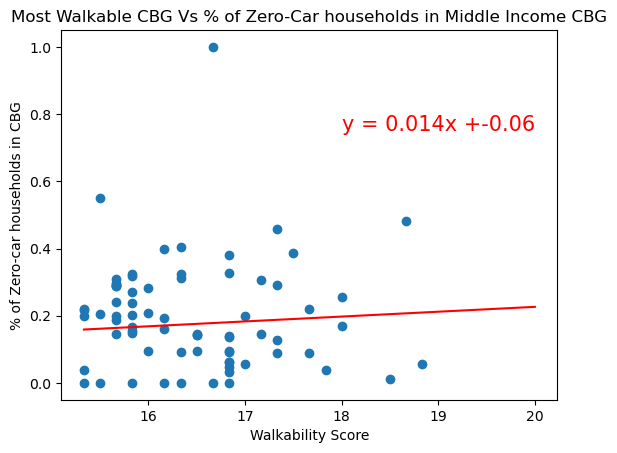

In [24]:
#label x and y axis and title scatter plot
plt.scatter(MediumData_set2["NatWalkInd"], MediumData_set2["Pct_AO0"])
plt.title("Most Walkable CBG Vs % of Zero-Car households in Middle Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of Zero-car households in CBG")


#Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(Data_set2["NatWalkInd"], Data_set2["Pct_AO0"])
regress_values = Data_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(Data_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(Data_set2["NatWalkInd"], Data_set2["Pct_AO0"])

#Printing line regression equation on graph
plt.annotate(line_eq,(18,.75),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of Zero-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/MediumIncomeZeroCar.png")

The correlation between walkabilty score and percent of One-Car Households in CBG is 0.03.


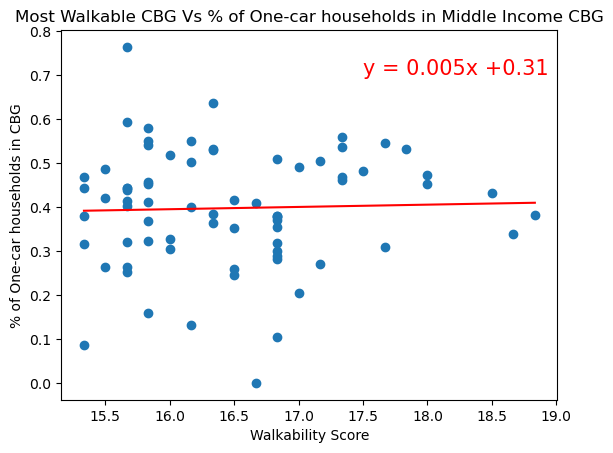

In [25]:
#label x and y axis and title scatter plot
plt.scatter(MediumData_set2["NatWalkInd"], MediumData_set2["Pct_AO1"])
plt.title("Most Walkable CBG Vs % of One-car households in Middle Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of One-car households in CBG")


#Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(MediumData_set2["NatWalkInd"], MediumData_set2["Pct_AO1"])
regress_values = MediumData_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(MediumData_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(MediumData_set2["NatWalkInd"], MediumData_set2["Pct_AO1"])

#Printing line regression equation on graph
plt.annotate(line_eq,(17.5,.7),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of One-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/MediumIncomeOneCar.png")

The correlation between walkabilty score and percent of Two-Plus-Car Households in CBG is 0.02.


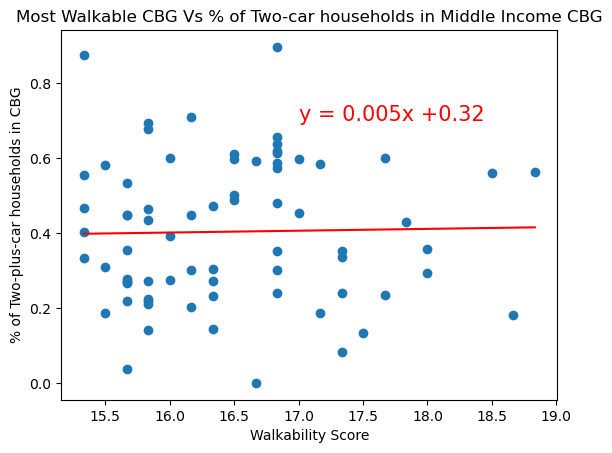

In [26]:
#label x and y axis and title scatter plot
plt.scatter(MediumData_set2["NatWalkInd"], MediumData_set2["Pct_AO2p"])
plt.title("Most Walkable CBG Vs % of Two-car households in Middle Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of Two-plus-car households in CBG")


#Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(MediumData_set2["NatWalkInd"], MediumData_set2["Pct_AO2p"])
regress_values = MediumData_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(MediumData_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(MediumData_set2["NatWalkInd"], MediumData_set2["Pct_AO2p"])

#Printing line regression equation on graph
plt.annotate(line_eq,(17,.7),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of Two-Plus-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/MediumIncometwoCar.png")

In [27]:
#Group specific CBG data by Core-Based Statistical Area, and calculate averages for 0, 1, 2+ car owner households, Middle income workers percent, and Walk score by area
Med_Summary_stats_df = MediumData_set2.groupby("CBSA_Name")
Average_0car=Med_Summary_stats_df["Pct_AO0"].mean()*100
Average_1car=Med_Summary_stats_df["Pct_AO1"].mean()*100
Average_2car=Med_Summary_stats_df["Pct_AO2p"].mean()*100
Average_middle_income_worker=Med_Summary_stats_df["% of Workers with Medium income per CBG"].mean()*100
Average_Walk_score=Med_Summary_stats_df["NatWalkInd"].mean()

In [28]:
#Place averages in summary table
Medium_Summary_table=pd.DataFrame({"Average Number of households with 0 Cars": Average_0car,"Average Number of households with 1 Cars": Average_1car, "Average Number of households with 2 Cars": Average_2car,"Average Workers with Middle income per Area":Average_middle_income_worker, "Average Walkability Score":Average_Walk_score})
Medium_Summary_table.sort_values("Average Walkability Score", ascending=False)

,Average Number of households with 0 Cars,Average Number of households with 1 Cars,Average Number of households with 2 Cars,Average Workers with Middle income per Area,Average Walkability Score
CBSA_Name,,,,,
"Houston-The Woodlands-Sugar Land, TX",30.721649,50.515464,18.762887,56.521739,17.166667
"Tucson, AZ",22.902812,45.029838,32.067350,58.764042,16.888889
"New Orleans-Metairie, LA",37.984496,37.984496,24.031008,56.923077,16.833333
"Albuquerque, NM",6.177606,28.185328,65.637066,57.142857,16.833333
"Providence-Warwick, RI-MA",22.850679,50.641026,26.508296,56.988400,16.750000
"Cape Coral-Fort Myers, FL",0.000000,40.909091,59.090909,61.500000,16.666667
"New York-Newark-Jersey City, NY-NJ-PA",100.000000,0.000000,0.000000,63.888889,16.666667
"Miami-Fort Lauderdale-Pompano Beach, FL",15.020568,41.582561,43.396871,57.502026,16.635802
"Jacksonville, FL",14.349776,24.663677,60.986547,56.634304,16.500000


In [29]:
#Reduce Summary Table
Medium_Sum_table=Medium_Summary_table[["Average Number of households with 0 Cars", "Average Number of households with 1 Cars", "Average Number of households with 2 Cars"]]
Medium_Sum_table

,Average Number of households with 0 Cars,Average Number of households with 1 Cars,Average Number of households with 2 Cars
CBSA_Name,,,
"Albuquerque, NM",6.177606,28.185328,65.637066
"Cape Coral-Fort Myers, FL",0.000000,40.909091,59.090909
"Chicago-Naperville-Elgin, IL-IN-WI",0.000000,52.941176,47.058824
"Detroit-Warren-Dearborn, MI",0.000000,44.444444,55.555556
"El Paso, TX",30.996310,41.328413,27.675277
"Houston-The Woodlands-Sugar Land, TX",30.721649,50.515464,18.762887
"Jacksonville, FL",14.349776,24.663677,60.986547
"Las Vegas-Henderson-Paradise, NV",22.012278,43.214794,34.772928
"Los Angeles-Long Beach-Anaheim, CA",15.437607,27.276541,57.285852


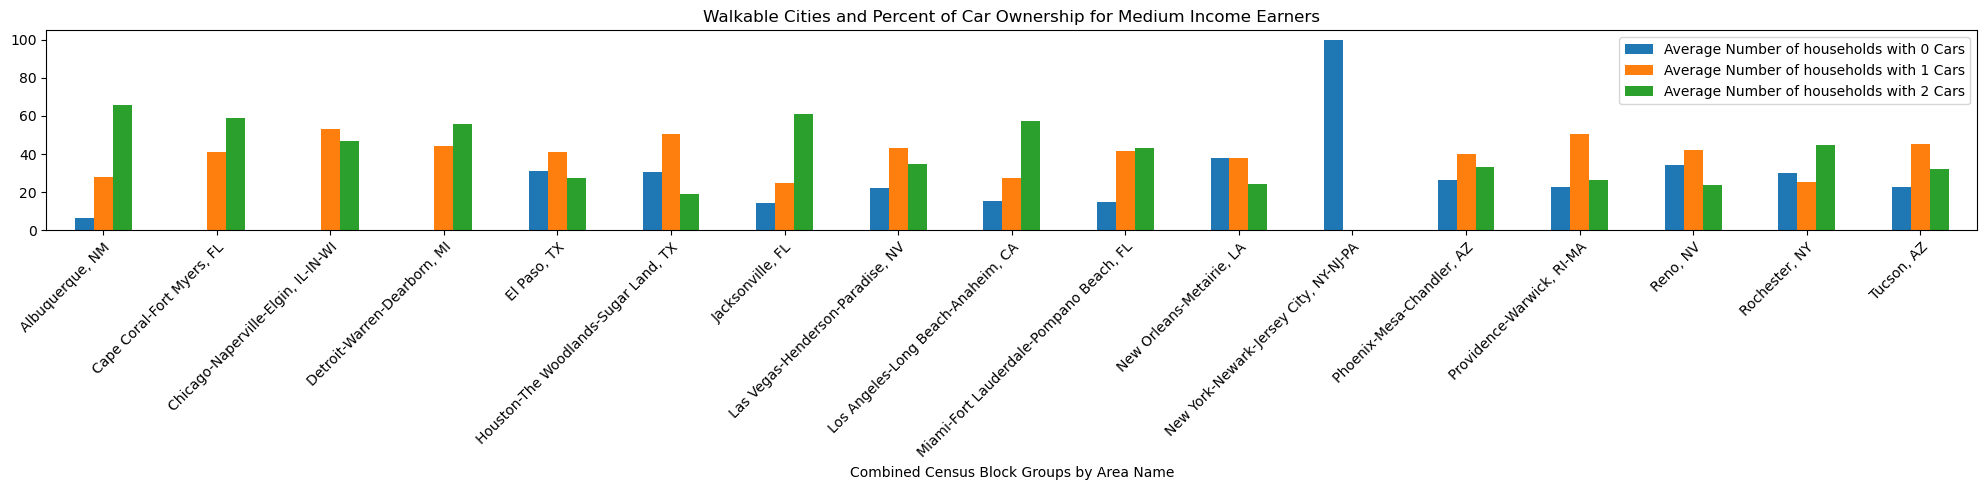

In [54]:
#Bar plot multiple columns
medium_multi_plot = Medium_Sum_table.plot(kind="bar", figsize=(20,5), title="Walkable Cities and Percent of Car Ownership for Medium Income Earners")
plt.xticks(rotation=45,rotation_mode="anchor", ha="right", wrap=True)
plt.xlabel("Combined Census Block Groups by Area Name")


plt.tight_layout()
plt.savefig("Output_data/MediumIncomeCarOwnership.png")
plt.show()




### Low-Income Analysis

In [31]:
#Locate most walkable groups based on National Walk index
Data_set2=Data_set1.loc[Data_set1["NatWalkInd"]>= 15.26,:]
#Data_set2.head(100)

In [32]:
#Locate CBG groups where percent of workers in low-income range is greater than 47
LowData_set2= Data_set2.loc[Data_set2["% of Workers with Low income per CBG"] >= .47,:]
LowData_set2.sort_values("NatWalkInd", ascending=False)

,index,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,...,D3A,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR,% of Workers with High income per CBG,% of Workers with Medium income per CBG,% of Workers with Low income per CBG
34,132340,"St. Louis, MO-IL",19.833333,180,96,62,22,115,0.502183,82,...,30.407852,0.000000,23.338757,0.00,0.000000,177397,298778,0.122222,0.344444,0.533333
934,102092,"Louisville/Jefferson County, KY-IN",18.833333,399,194,161,44,354,0.661682,158,...,41.272331,0.000000,27.121974,151.55,0.000000,98390,148282,0.110276,0.403509,0.486216
1097,100854,"Louisville/Jefferson County, KY-IN",18.666667,442,215,160,67,424,0.777982,121,...,35.317358,7.300915,20.200761,0.00,0.000000,147489,231729,0.151584,0.361991,0.486425
1494,152378,"Syracuse, NY",18.500000,348,164,142,42,223,0.518605,128,...,23.318483,0.528545,20.466281,76.44,0.000000,48327,99158,0.120690,0.408046,0.471264
1939,214679,"Milwaukee-Waukesha, WI",18.333333,320,159,117,44,29,0.200000,54,...,31.476205,0.000000,19.905330,135.45,0.000000,129617,154657,0.137500,0.365625,0.496875
2210,154128,"New York-Newark-Jersey City, NY-NJ-PA",18.166667,2,1,1,0,0,0.000000,0,...,28.100337,5.191371,19.752902,131.43,0.508451,2226960,5264272,0.000000,0.500000,0.500000
3339,86252,"Chicago-Naperville-Elgin, IL-IN-WI",17.833333,591,314,91,186,21,0.328125,9,...,48.724777,0.000000,48.271305,135.45,0.039511,212930,339349,0.314721,0.153976,0.531303
3753,172476,"Toledo, OH",17.833333,237,116,88,33,308,0.649789,146,...,29.008774,0.113828,15.113701,101.93,0.000000,1413,17313,0.139241,0.371308,0.489451
4837,60285,"New Haven-Milford, CT",17.500000,667,348,159,160,4,0.500000,0,...,34.910018,0.000000,16.926881,191.78,0.000000,73047,105253,0.239880,0.238381,0.521739
4950,8552,"El Paso, TX",17.500000,272,129,119,24,85,0.456989,75,...,33.307373,0.000000,29.964238,245.42,0.000000,31862,65918,0.088235,0.437500,0.474265


The correlation between walkabilty score and percent of Zero-Car Households in CBG is 0.18.


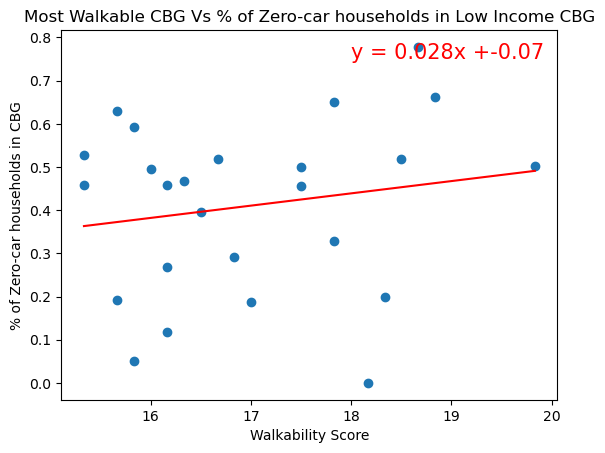

In [33]:
#label x and y axis and title scatter plot
plt.scatter(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO0"])
plt.title("Most Walkable CBG Vs % of Zero-car households in Low Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of Zero-car households in CBG")


#Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO0"])
regress_values = LowData_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(LowData_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO0"])

#Printing line regression equation on graph
plt.annotate(line_eq,(18,.75),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of Zero-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/LowIncomeZeroCar.png")

The correlation between walkabilty score and percent of One-Car Households in CBG is -0.3.


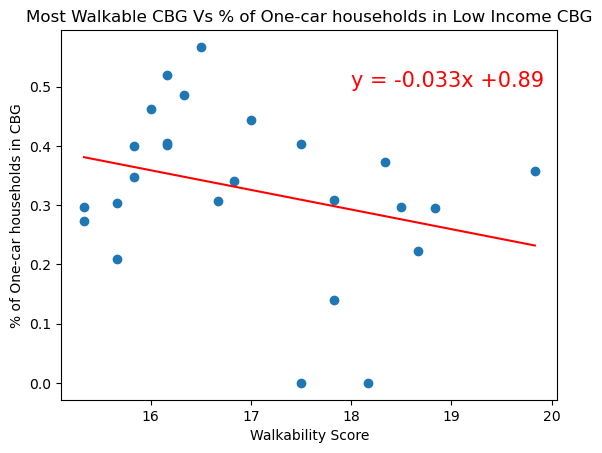

In [34]:
#label x and y axis and title scatter plot
plt.scatter(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO1"])
plt.title("Most Walkable CBG Vs % of One-car households in Low Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of One-car households in CBG")


#Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO1"])
regress_values = LowData_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(LowData_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO1"])

#Printing line regression equation on graph
plt.annotate(line_eq,(18,.5),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of One-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/LowIncomeOneCar.png")

The correlation between walkabilty score and percent of Two-Plus-Car Households in CBG is -0.17.


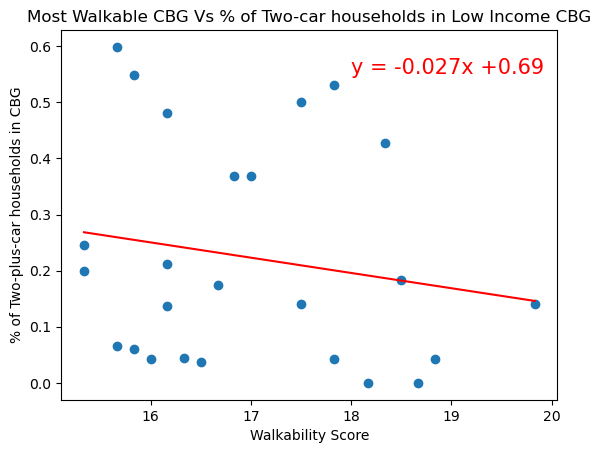

In [35]:
# #label x and y axis and title scatter plot
plt.scatter(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO2p"])
plt.title("Most Walkable CBG Vs % of Two-car households in Low Income CBG")
plt.xlabel("Walkability Score")
plt.ylabel("% of Two-plus-car households in CBG")


# #Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO2p"])
regress_values = LowData_set2["NatWalkInd"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))
plt.plot(LowData_set2["NatWalkInd"],regress_values,"r-")
correlation = st.pearsonr(LowData_set2["NatWalkInd"], LowData_set2["Pct_AO2p"])

# #Printing line regression equation on graph
plt.annotate(line_eq,(18,.55),fontsize=15,color="red")

print(f'The correlation between walkabilty score and percent of Two-Plus-Car Households in CBG is {round(correlation[0],2)}.')
plt.savefig("Output_data/LowIncomeTwoCar.png")

In [36]:
#Group specific CBG data by Core-Based Statistical Area, and calculate averages for 0, 1, 2+ car owner households, Low income workers, and Walk score by area
LowSummary_stats_df = LowData_set2.groupby("CBSA_Name")
Average_0car=LowSummary_stats_df["Pct_AO0"].mean()*100
Average_1car=LowSummary_stats_df["Pct_AO1"].mean()*100
Average_2car=LowSummary_stats_df["Pct_AO2p"].mean()*100
Average_low_income_worker=LowSummary_stats_df["% of Workers with Low income per CBG"].mean()*100
Average_Walk_score=LowSummary_stats_df["NatWalkInd"].mean()

In [37]:
#Place averages in summary table
LowSummary_table=pd.DataFrame({"Average Number of households with 0 Cars": Average_0car,"Average Number of households with 1 Cars": Average_1car, "Average Number of households with 2 Cars": Average_2car,"Average Workers with Low income per Area":Average_low_income_worker, "Average Walkability Score":Average_Walk_score })
LowSummary_table.sort_values("Average Walkability Score", ascending=False)

,Average Number of households with 0 Cars,Average Number of households with 1 Cars,Average Number of households with 2 Cars,Average Workers with Low income per Area,Average Walkability Score
CBSA_Name,,,,,
"St. Louis, MO-IL",50.218341,35.807860,13.973799,53.333333,19.833333
"Syracuse, NY",51.860465,29.767442,18.372093,47.126437,18.500000
"New York-Newark-Jersey City, NY-NJ-PA",0.000000,0.000000,0.000000,50.000000,18.166667
"Chicago-Naperville-Elgin, IL-IN-WI",32.812500,14.062500,53.125000,53.130288,17.833333
"Toledo, OH",64.978903,30.801688,4.219409,48.945148,17.833333
"Louisville/Jefferson County, KY-IN",52.121588,34.171393,13.707019,49.830140,17.666667
"El Paso, TX",45.698925,40.322581,13.978495,47.426471,17.500000
"New Haven-Milford, CT",39.583333,17.013889,43.402778,53.896480,17.166667
"Milwaukee-Waukesha, WI",37.532827,38.506552,23.960621,50.018560,16.666667


In [38]:
#Reduce Summary Table
LowSum_table=LowSummary_table[["Average Number of households with 0 Cars", "Average Number of households with 1 Cars", "Average Number of households with 2 Cars"]]
LowSum_table

,Average Number of households with 0 Cars,Average Number of households with 1 Cars,Average Number of households with 2 Cars
CBSA_Name,,,
"Ann Arbor, MI",32.689089,34.511789,32.799122
"Chicago-Naperville-Elgin, IL-IN-WI",32.812500,14.062500,53.125000
"Cleveland-Elyria, OH",56.204882,38.324970,5.470148
"Columbus, OH",5.142857,40.000000,54.857143
"El Paso, TX",45.698925,40.322581,13.978495
"Louisville/Jefferson County, KY-IN",52.121588,34.171393,13.707019
"Milwaukee-Waukesha, WI",37.532827,38.506552,23.960621
"Minneapolis-St. Paul-Bloomington, MN-WI",52.769679,27.259475,19.970845
"Montgomery, AL",11.764706,40.196078,48.039216


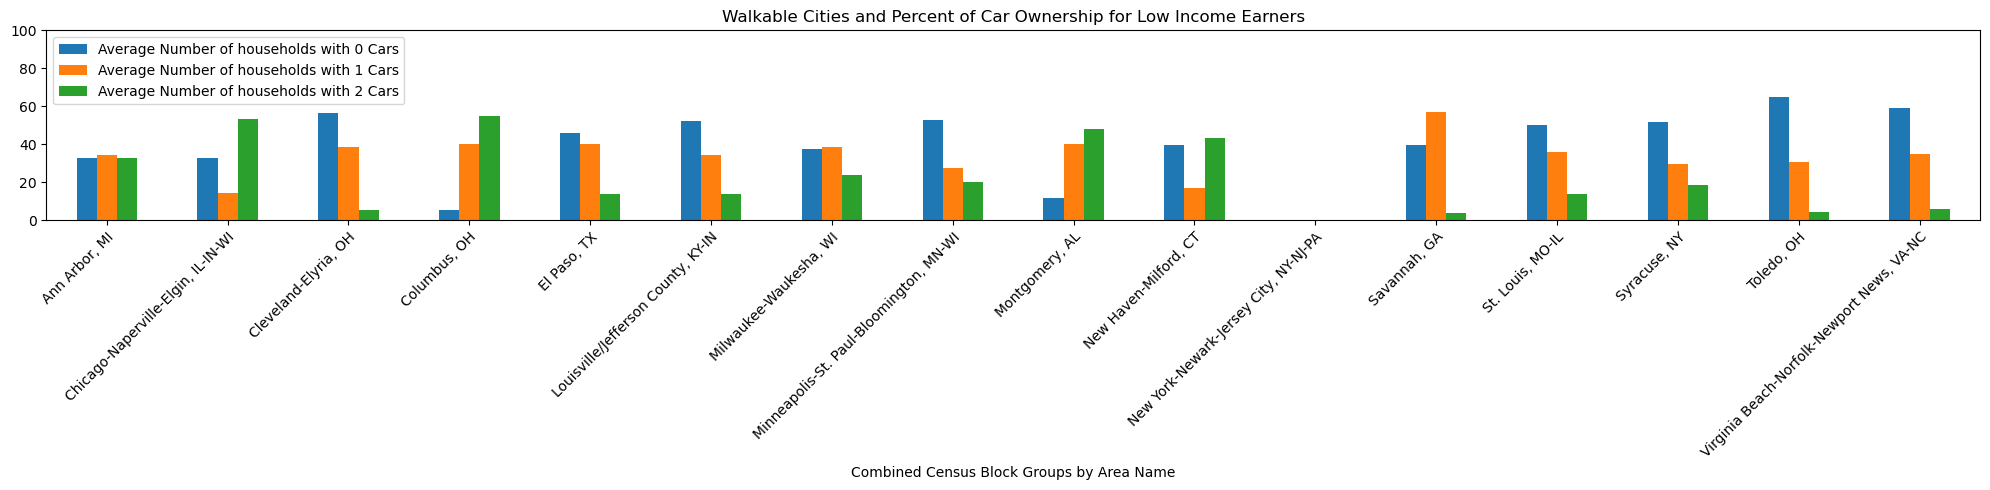

In [62]:
#Bar plot multiple columns
low_multi_plot = LowSum_table.plot(kind="bar", figsize=(20,5), title="Walkable Cities and Percent of Car Ownership for Low Income Earners")
plt.xticks(rotation=45,rotation_mode="anchor", ha="right", wrap=True)
plt.xlabel("Combined Census Block Groups by Area Name")

plt.ylim(0,100)
plt.tight_layout()

plt.savefig("Output_data/LowIncomeCarOwnership.png")
plt.show()

### Transit-Stop Analysis

In [40]:
#Create a Data frame and a new column adding car ownership totals 
most_walkable_cbg=Data_set1
most_walkable_cbg["% of 1 plus car household"]= (most_walkable_cbg["Pct_AO1"]+most_walkable_cbg["Pct_AO2p"])
most_walkable_cbg

,index,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,...,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR,% of Workers with High income per CBG,% of Workers with Medium income per CBG,% of Workers with Low income per CBG,% of 1 plus car household
0,39730,"Los Angeles-Long Beach-Anaheim, CA",20.000000,535,99,153,283,184,0.393162,147,...,0.0,22.690802,126.07,0.000000,184345,281212,0.528972,0.285981,0.185047,0.606838
1,34840,"San Francisco-Oakland-Berkeley, CA",20.000000,456,38,48,370,117,0.208929,327,...,0.0,23.708112,144.84,0.856784,220015,519108,0.811404,0.105263,0.083333,0.791071
2,160923,"New York-Newark-Jersey City, NY-NJ-PA",20.000000,501,101,112,288,77,0.141026,382,...,0.0,21.326475,151.55,0.992191,345206,512184,0.574850,0.223553,0.201597,0.858974
3,54882,"Glenwood Springs, CO",20.000000,700,201,233,266,0,0.000000,125,...,0.0,30.713517,126.07,0.000000,4761,5742,0.380000,0.332857,0.287143,1.000000
4,113801,"Boston-Cambridge-Newton, MA-NH",20.000000,415,85,148,182,155,0.536332,82,...,0.0,23.205366,158.25,0.000000,61697,91869,0.438554,0.356627,0.204819,0.463668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84904,162021,"New York-Newark-Jersey City, NY-NJ-PA",5.666667,25,9,6,10,0,0.000000,0,...,0.0,0.767410,603.50,0.000000,791795,1605396,0.400000,0.240000,0.360000,0.000000
84905,160870,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,...,0.0,2.313139,654.47,0.151904,430014,831152,NaN,NaN,NaN,0.000000
84906,163147,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,...,0.0,2.909241,747.00,0.000000,684827,1441344,NaN,NaN,NaN,0.000000
84907,149641,"New York-Newark-Jersey City, NY-NJ-PA",5.333333,0,0,0,0,0,0.000000,0,...,0.0,0.000000,655.81,0.000000,366455,1582123,NaN,NaN,NaN,0.000000


In [41]:
#locate most walkable CBG
most_walkable_cbg=Data_set1.loc[Data_set1["NatWalkInd"]>= 15.26,:]
most_walkable_cbg

,index,CBSA_Name,NatWalkInd,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,AutoOwn0,Pct_AO0,AutoOwn1,...,D3AAO,D3APO,D4A,D4B025,D5BE,D5BR,% of Workers with High income per CBG,% of Workers with Medium income per CBG,% of Workers with Low income per CBG,% of 1 plus car household
0,39730,"Los Angeles-Long Beach-Anaheim, CA",20.000000,535,99,153,283,184,0.393162,147,...,0.0,22.690802,126.07,0.000000,184345,281212,0.528972,0.285981,0.185047,0.606838
1,34840,"San Francisco-Oakland-Berkeley, CA",20.000000,456,38,48,370,117,0.208929,327,...,0.0,23.708112,144.84,0.856784,220015,519108,0.811404,0.105263,0.083333,0.791071
2,160923,"New York-Newark-Jersey City, NY-NJ-PA",20.000000,501,101,112,288,77,0.141026,382,...,0.0,21.326475,151.55,0.992191,345206,512184,0.574850,0.223553,0.201597,0.858974
3,54882,"Glenwood Springs, CO",20.000000,700,201,233,266,0,0.000000,125,...,0.0,30.713517,126.07,0.000000,4761,5742,0.380000,0.332857,0.287143,1.000000
4,113801,"Boston-Cambridge-Newton, MA-NH",20.000000,415,85,148,182,155,0.536332,82,...,0.0,23.205366,158.25,0.000000,61697,91869,0.438554,0.356627,0.204819,0.463668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,185828,"Salem, OR",15.333333,1149,241,404,504,87,0.100000,452,...,0.0,18.344185,541.81,0.000000,16051,26295,0.438642,0.351610,0.209748,0.900000
23249,27851,"Phoenix-Mesa-Chandler, AZ",15.333333,642,130,211,301,125,0.127943,458,...,0.0,8.322667,154.23,0.000000,73589,175058,0.468847,0.328660,0.202492,0.872057
23250,186103,"Harrisburg-Carlisle, PA",15.333333,444,115,160,169,127,0.277899,182,...,0.0,14.938791,241.40,0.000000,31419,76062,0.380631,0.360360,0.259009,0.722101
23251,153199,"New York-Newark-Jersey City, NY-NJ-PA",15.333333,636,176,220,240,130,0.250482,230,...,0.0,16.443953,0.00,0.000000,295657,505609,0.377358,0.345912,0.276730,0.749518


Text(0.5, 1.0, 'Nearest Transit Stop Vs % of Household with Zero Car in Most Walkable Communities')

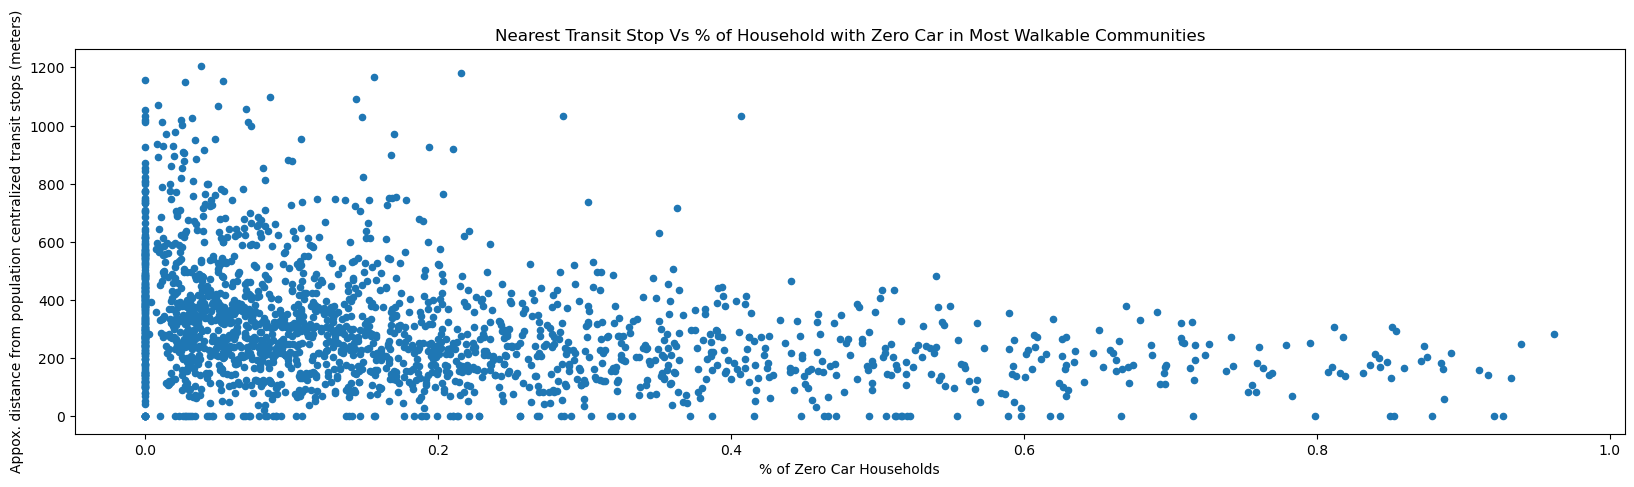

In [42]:
#Plotting a sample size of 2000 of distance for population centralized transit stops and % per household with zero car ownship
transit_plot0 = most_walkable_cbg.sample(2000).plot(kind="scatter", figsize=(20,5), x="Pct_AO0", y="D4A")
plt.xlabel("% of Zero Car Households")
plt.ylabel("Appox. distance from population centralized transit stops (meters)")
plt.title("Nearest Transit Stop Vs % of Household with Zero Car in Most Walkable Communities")

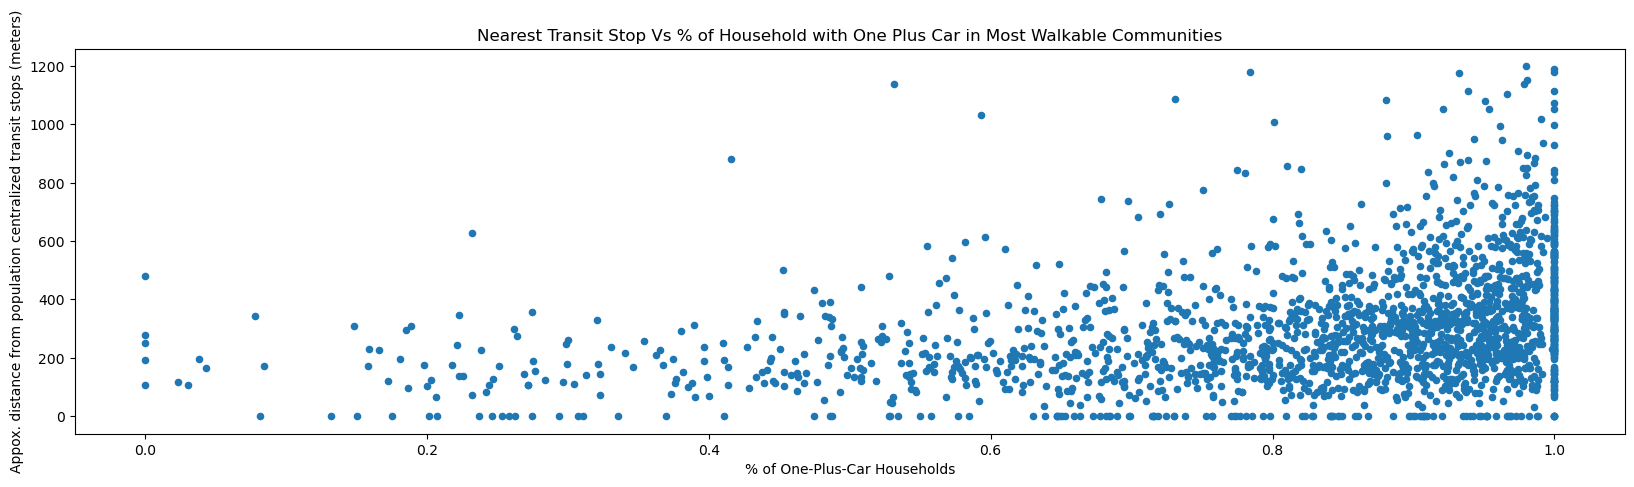

In [43]:
#Plotting a sample size of 2000 of distance for population centralized transit stops and % per household with car ownership
transit_plot1 = most_walkable_cbg.sample(2000).plot(kind="scatter", figsize=(20,5), x="% of 1 plus car household", y="D4A")
plt.xlabel("% of One-Plus-Car Households")
plt.ylabel("Appox. distance from population centralized transit stops (meters)")
plt.title("Nearest Transit Stop Vs % of Household with One Plus Car in Most Walkable Communities")

plt.savefig("Output_data/NearTransitOnePlusCarOwnership.png")